# Ensemble Model for Bitcoin Price Analysis and Prediction

## Introduction

This project introduces an advanced **Ensemble Model** designed to analyze and predict Bitcoin (BTC) price movements. By integrating three distinct modeling approaches, it provides a robust and comprehensive framework for understanding Bitcoin's price dynamics, both in current market conditions and for future projections.

## Core Components

### 1. Log-Log Model

The Log-Log model leverages a double logarithmic scale to analyze Bitcoin's price trends, making it particularly suited for assets with exponential growth patterns. This approach helps linearize Bitcoin's trend over time, making long-term behavior more interpretable.

**Key features:**
- Applies logarithmic scaling to both price and time axes
- Reveals long-term trends and growth rates
- Effective for assets characterized by high volatility and exponential growth
- Provides `BottomLine` and `TopLine` price boundaries

### 2. ThermoModel

The ThermoModel combines cubic and logarithmic regression techniques to analyze and predict Bitcoin price movements. By creating dynamic price bands and oscillators, it identifies potential buy and sell zones, offering a comprehensive tool for understanding market trends and informing investment decisions.

**Key features:**
- Uses logarithmic and cubic regressions to model Bitcoin's growth
- Identifies long-term trends and potential price shifts
- Especially effective for volatile, fast-growing assets
- Provides `lower_cubiclog` and `upper_cubiclog` price boundaries

### 3. Slopes Growth Model

The Slopes Growth Model focuses on analyzing Bitcoin's price evolution through slope-based growth patterns. This model captures different phases of Bitcoin's market cycles by examining growth rate changes over time.

**Key features:**
- Analyzes growth rate variations and slope changes
- Captures market cycle transitions and momentum shifts
- Provides complementary perspective to logarithmic approaches
- Delivers `lower` and `upper` price boundaries based on growth dynamics

## Ensemble Methodology

### Data Fusion

The Ensemble Model begins by merging data from all three constituent models (Log-Log, Thermo, and Slopes Growth). This ensures the time series from each model is perfectly aligned, resulting in a synchronized dataset for comprehensive analysis.

### Price Corridor Calculation

A key innovation of the Ensemble approach is the construction of a unified price corridor using **triple-model averaging**.


**Weighted Approach:**

$$
\text{Lower Band} = \frac{w_1 \cdot \text{BottomLine} + w_2 \cdot \text{lower\_cubiclog} + w_3 \cdot \text{lower\_slopes}}{w_1 + w_2 + w_3}
$$

$$
\text{Upper Band} = \frac{w_1 \cdot \text{TopLine} + w_2 \cdot \text{upper\_cubiclog} + w_3 \cdot \text{upper\_slopes}}{w_1 + w_2 + w_3}
$$

By combining the strengths of all three models, this method offers the most reliable price range estimation available.

### Oscillator Development

The Ensemble Model introduces a sophisticated oscillator that measures the current price position within the tri-model price corridor:

**Oscillator Formula:**

$$
\text{Oscillator} = 100 \times \frac{\ln(\text{Price}) - \ln(\text{Lower Band})}{\ln(\text{Upper Band}) - \ln(\text{Lower Band})}
$$

**Key Properties:**
- Scaled from 0 to 100, where 0 represents the lower band and 100 the upper band
- Provides normalized indication of Bitcoin's price position, independent of absolute price levels
- Incorporates insights from all three analytical approaches

### Trend Smoothing

To reduce noise and highlight key trends, the oscillator undergoes advanced smoothing using **LOWESS (Locally Weighted Scatterplot Smoothing)** with optimized parameters for Bitcoin's specific volatility characteristics.

## Visualization and Analysis

### Main Price Chart

- Displays Bitcoin price on a logarithmic scale for clear trend visualization
- Shows tri-model averaged upper and lower bands of the refined price corridor
- Includes annotations for current oscillator value and expected top projections
- Features high-resolution output (350 DPI) suitable for professional presentations
- Incorporates Bitcoin logo overlay for branding

### Oscillator Chart

- Visualizes the LOWESS-smoothed oscillator with color-coded scatter plot
- Highlights potential buy and sell zones with clear visual indicators
- Features color-coded zones for intuitive market interpretation:
  - **Red Zone (90-100%)**: SELL ZONE - Potential market top
  - **Yellow Zone (50-90%)**: Neutral territory
  - **Green Zone (0-10%)**: BUY ZONE - Potential market bottom
- Offers historical zone annotations marking previous buy/sell opportunities
- Provides quick reference for current market positioning

## Advantages of the Ensemble Approach

1. **Enhanced Robustness**: Triple-model validation reduces individual model weaknesses and enhances overall accuracy through cross-model error compensation.
2. **Comprehensive Market Insight**: Provides multiple analytical perspectives in a single framework, delivering both absolute price projections and relative strength indicators with historical context.
3. **Superior Risk Management**: Clearly defined buy and sell zones with statistical backing support better risk assessment and portfolio management decisions.
4. **Adaptive Intelligence**: Dynamic model weighting capabilities allow the system to adjust to changing market conditions, incorporating diverse analytical methodologies.
5. **Professional-Grade Output**: Publication-ready visualizations with comprehensive statistical foundation, scalable for institutional analysis and regulatory compliance.

## Technical Implementation

### Data Requirements

- `loglog.csv`: Contains `time`, `PriceUSD`, `BottomLine`, `TopLine` columns  
- `thermomodel.csv`: Contains `time`, `lower_cubiclog`, `upper_cubiclog` columns  
- `slopes_growth.csv`: Contains `date`, `upper`, `lower` columns


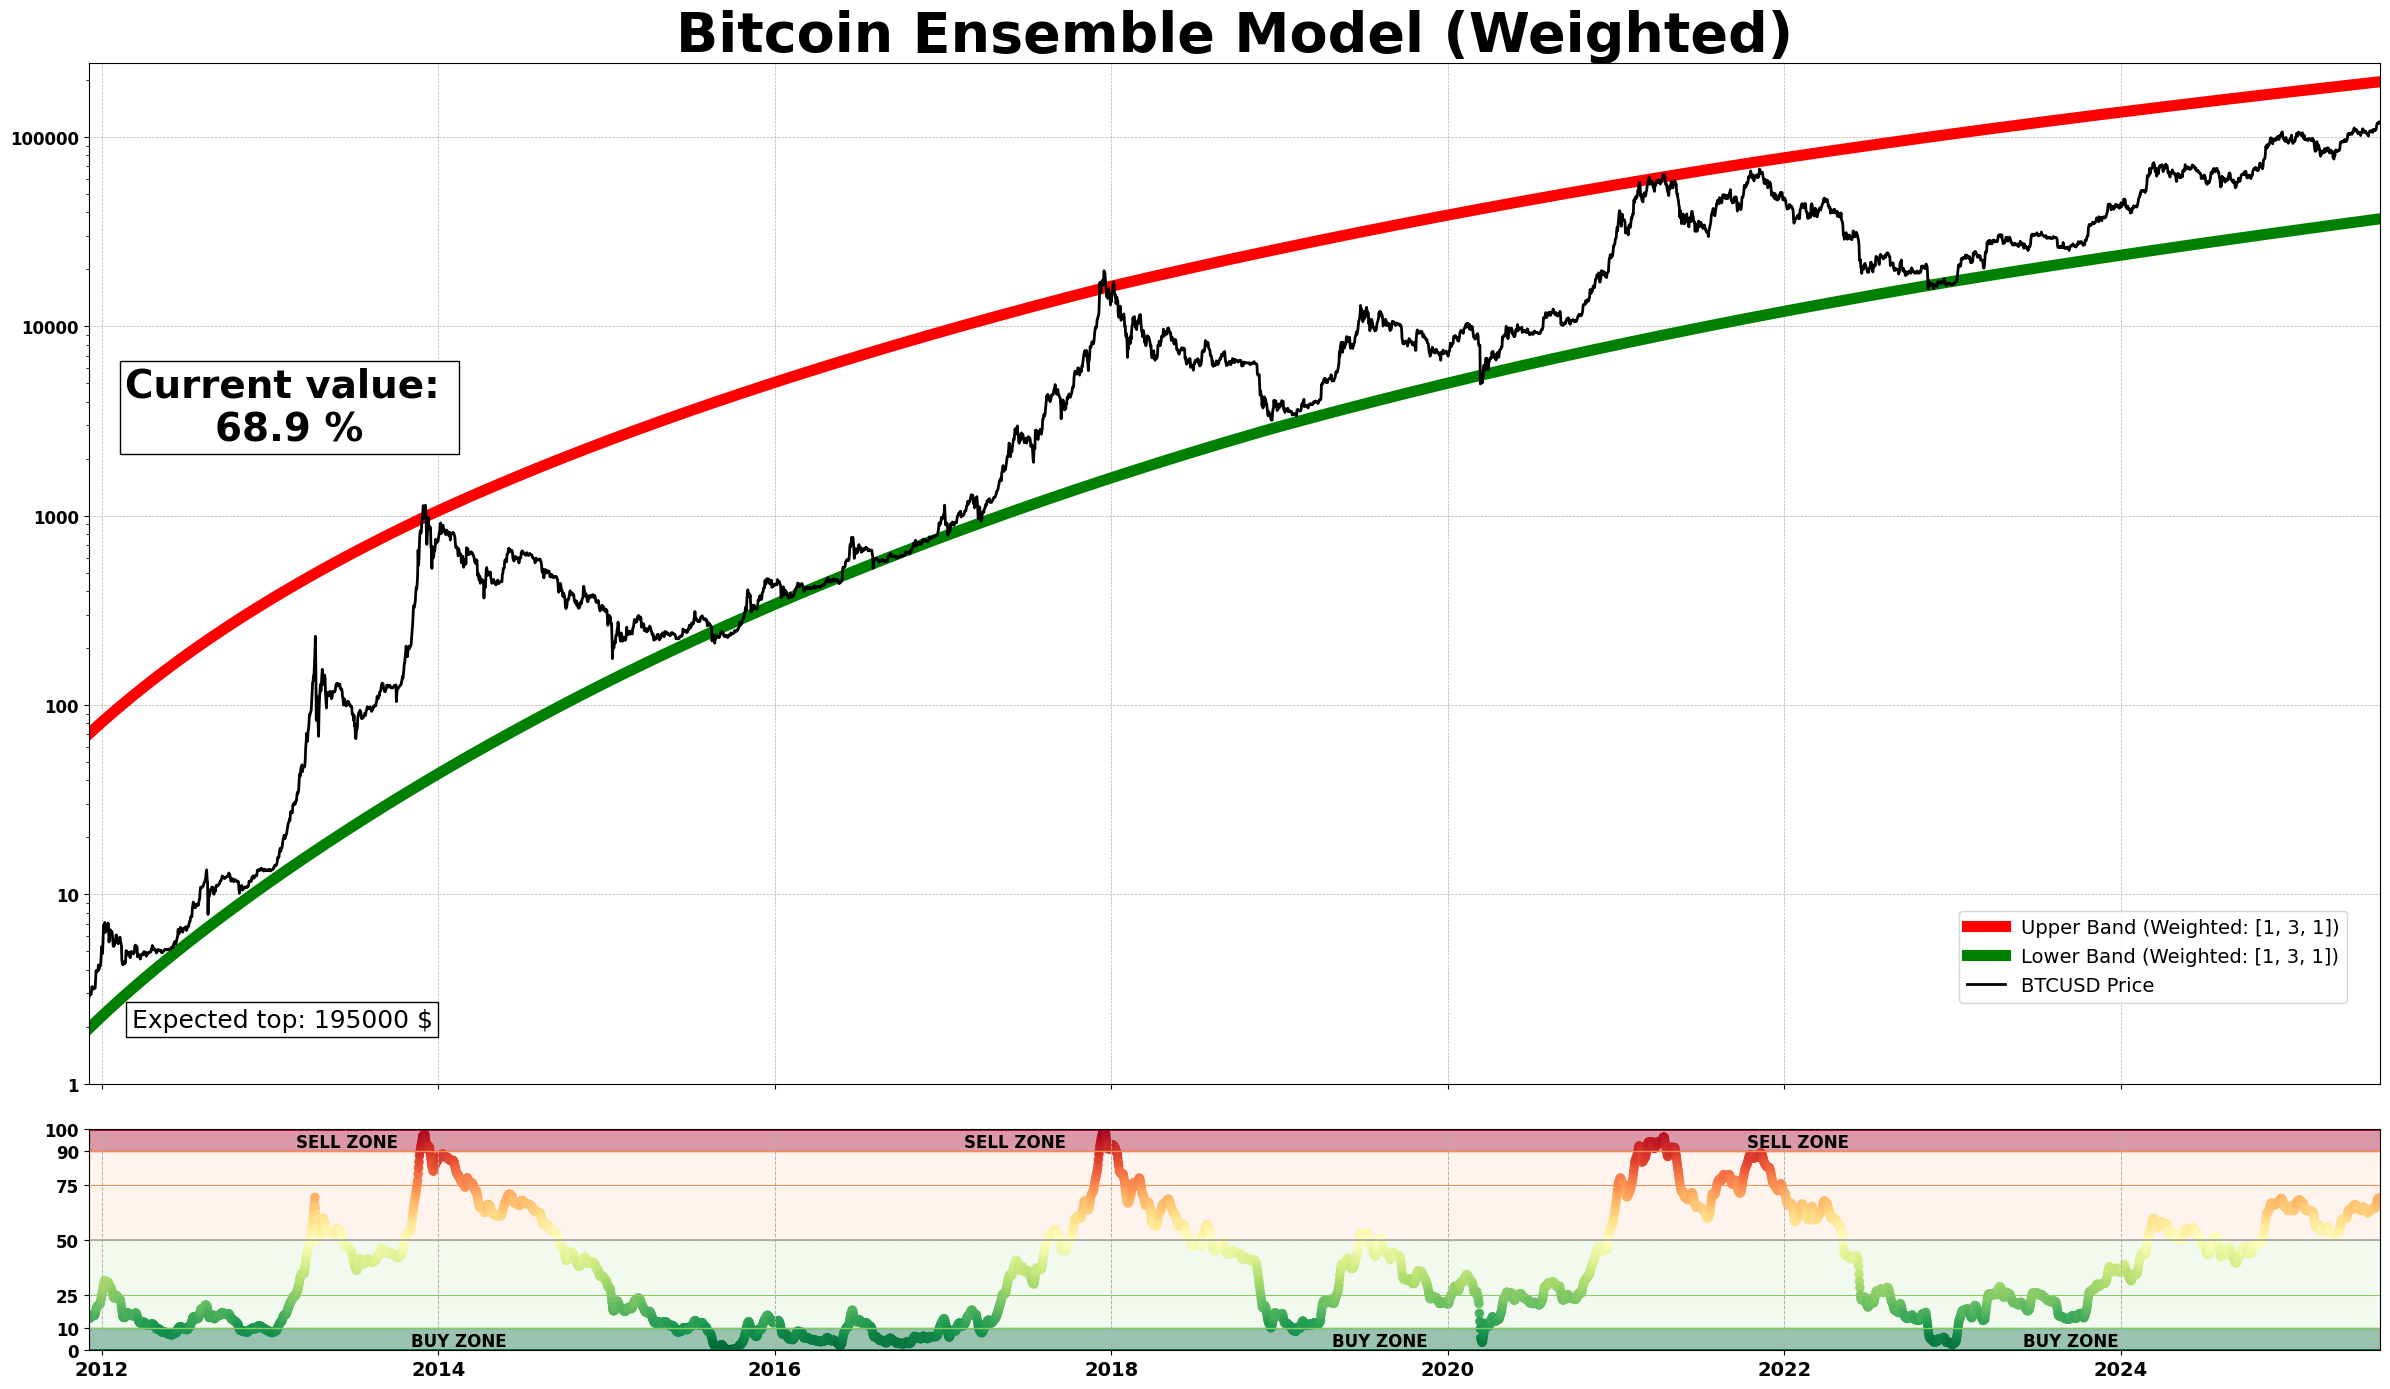

In [1]:
import sys
sys.path.append("/Users/danieleraimondi/bitcoin_datascience/functions")

from functions_EnsembleCorridor import plot_ensemble_corridor


import warnings
warnings.filterwarnings("ignore")

plot_ensemble_corridor(
    loglog_path="/Users/danieleraimondi/bitcoin_datascience/data/loglog_model.csv",
    thermomodel_path="/Users/danieleraimondi/bitcoin_datascience/data/thermomodel.csv",
    slopes_growth_path="/Users/danieleraimondi/bitcoin_datascience/data/slopes_growth.csv",
    btc_logo_path="/Users/danieleraimondi/btc_charts/btc_charts/utils/btc_logo.png",
    output_path="../output/1d.EnsembleCorridor.jpg",
    weights=[1, 3, 1],  # [loglog, thermo, slopes_growth]
)